In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Activation

# Data Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(seed=113, start_char=-1, oov_char=-2, index_from=3)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(25000,)

In [4]:
np.unique(y_train)

array([0, 1])

In [5]:
unique, counts = np.unique(y_train,return_counts=True)

In [6]:
print(dict(zip(unique,counts)))

{0: 12500, 1: 12500}


In [7]:
unique, counts = np.unique(y_test,return_counts=True)

In [8]:
print(dict(zip(unique,counts)))

{0: 12500, 1: 12500}


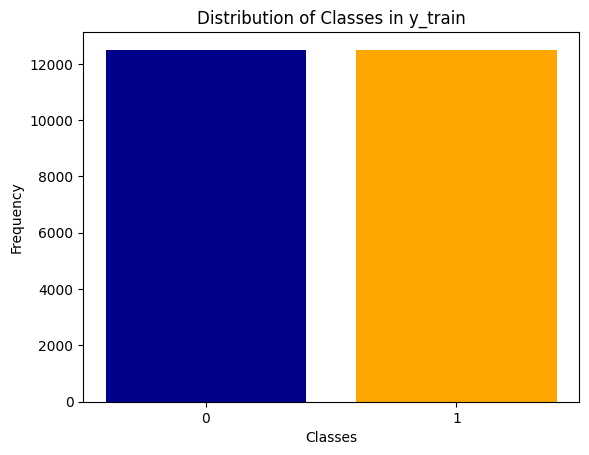

In [9]:
class_counts = [np.sum(y_train == i) for i in range(2)] 

colors = ['darkblue', 'orange']

plt.bar(['0', '1'], class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in y_train')
plt.show()

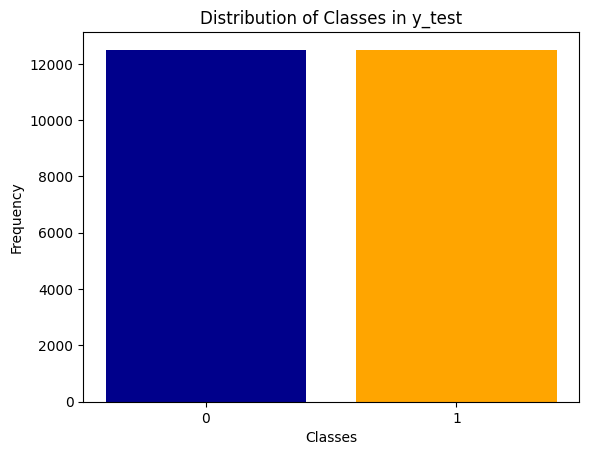

In [10]:
class_counts = [np.sum(y_test == i) for i in range(2)]

colors = ['darkblue', 'orange']

plt.bar(['0', '1'], class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in y_test')
plt.show()

In [11]:
review_len_train= []
review_len_test= []

for i,ii in zip(x_train,x_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

In [12]:
review_len_train[:11]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450]

/tmp/ipykernel_21/2505462126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_train, hist_kws={"alpha": 0.3})
/tmp/ipykernel_21/2505462126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_test, hist_kws={"alpha": 0.3})


<Axes: ylabel='Density'>

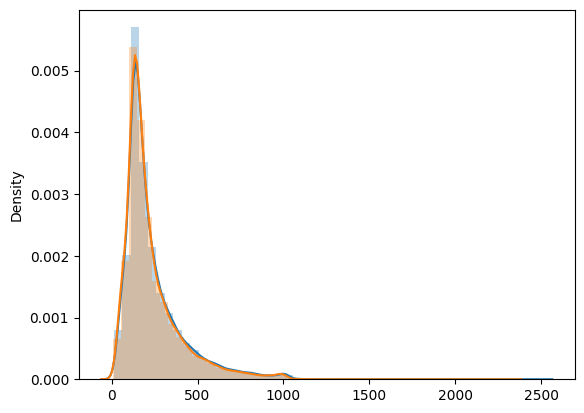

In [13]:
sns.distplot(review_len_train, hist_kws={"alpha": 0.3})
sns.distplot(review_len_test, hist_kws={"alpha": 0.3})

In [14]:
print(np.mean(review_len_train))
print(np.median(review_len_train))

238.71364
178.0


In [15]:
from scipy import stats

print(stats.mode(review_len_train))

ModeResult(mode=132, count=196)


In [16]:
word_index = imdb.get_word_index()

print(type(word_index))

1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [17]:
len(word_index)

88584

In [18]:
# The Most Used Word
for keys,values in word_index.items():
    if values==1:
        print(keys)

the


## Filling Words

In [19]:
def whatis(index=24):
    reverse_index =dict([(value,key) for (key,value) in word_index.items()])
    decode_review= " ".join([reverse_index.get(i-3,'!') for i in x_train[index]])
    print(y_train[index])
    return decode_review

In [20]:
decode_review = whatis(4)

0


In [21]:
decode_review

"! worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the microwave and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

In [22]:
num_words= 15000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [23]:
maxlen = 130

x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)

In [24]:
x_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
        778,  128,   74,   12,  630,  163,   15,    4, 1766, 7982, 1051,
          2,   32,   85,  156,   45,   40,  148,  139,  121,  664,  665,
         10,   10, 1361,  173,    4,  749,    2,   16, 3804,    8,    4,
        226,   65,   12,   43,  127,   24,    2,   10,   10], dtype=int32)

In [25]:
for i in x_train[:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [26]:
decoded_review = whatis(5)

0


In [27]:
decoded_review

"! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br"

# RNN Model

In [28]:
rnn = Sequential()

In [29]:
rnn.add(Embedding(num_words,32,input_length=len(x_train[0])))

In [30]:
rnn.add(SimpleRNN(16,input_shape=(num_words,maxlen),return_sequences=False,activation='relu'))

In [31]:
rnn.add(Dense(1, activation='sigmoid'))

# Model derlemesi
rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Model özetini görüntüleme
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
history = rnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=1)


Epoch 1/5
196/196 [==============================] - 11s 48ms/step - loss: 0.6498 - accuracy: 0.6309 - val_loss: 0.5745 - val_accuracy: 0.7823
Epoch 2/5
196/196 [==============================] - 9s 48ms/step - loss: 0.5133 - accuracy: 0.8104 - val_loss: 0.5330 - val_accuracy: 0.7926
Epoch 3/5
196/196 [==============================] - 9s 44ms/step - loss: 0.4137 - accuracy: 0.8457 - val_loss: 0.3833 - val_accuracy: 0.8355
Epoch 4/5
196/196 [==============================] - 9s 45ms/step - loss: 0.3543 - accuracy: 0.8640 - val_loss: 0.3741 - val_accuracy: 0.8386
Epoch 5/5
196/196 [==============================] - 9s 45ms/step - loss: 0.3088 - accuracy: 0.8762 - val_loss: 0.3625 - val_accuracy: 0.8430


In [33]:
score = rnn.evaluate(x_test,y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.3625 - accuracy: 0.8430


In [34]:
print("accuracy", score[1]*100)

accuracy 84.30399894714355


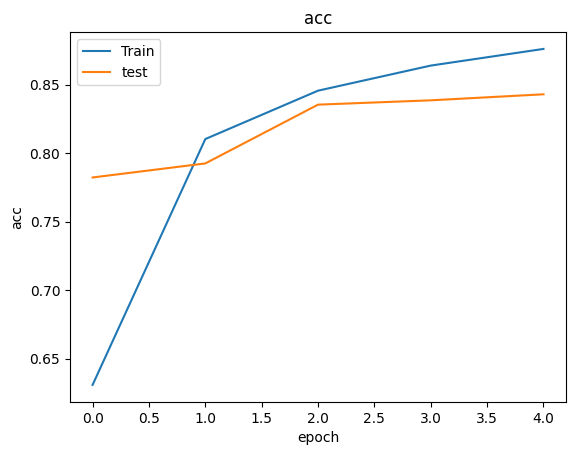

In [35]:
plt.figure() 
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="test")
plt.title("acc") 
plt.xlabel("epoch") 
plt.ylabel("acc") 
plt.legend()
plt.show()

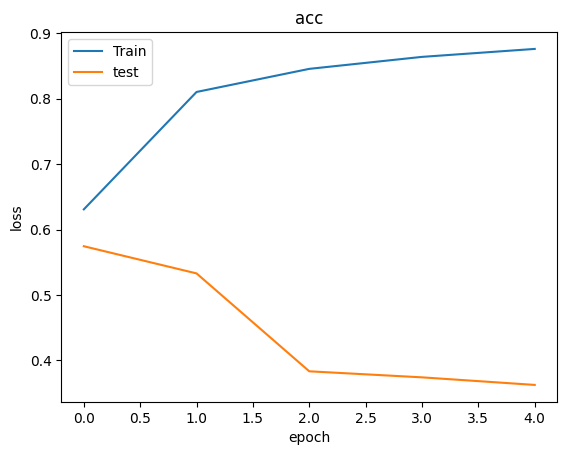

In [36]:
plt.figure() 
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_loss"], label="test")
plt.title("acc") 
plt.xlabel("epoch") 
plt.ylabel("loss") 
plt.legend()
plt.show()